In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [2]:
data=pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.shape

(14640, 15)

In [4]:
data.isnull().any()
data['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

Text(0.5, 1.0, 'Virgin America')

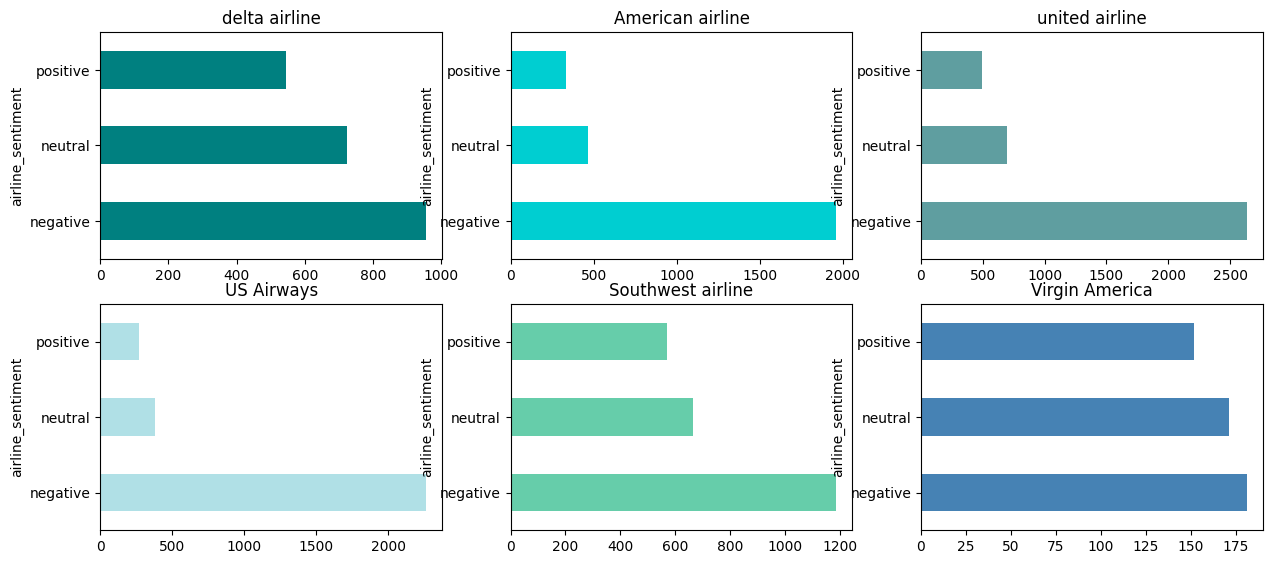

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(331)
data[data['airline']=='Delta']['airline_sentiment'].value_counts().plot(kind='barh',color='teal')
plt.title('delta airline')

plt.subplot(332)
data[data['airline']=='American']['airline_sentiment'].value_counts().plot(kind='barh',color='darkturquoise')
plt.title('American airline')

plt.subplot(333)
data[data['airline']=='United']['airline_sentiment'].value_counts().plot(kind='barh',color='cadetblue')
plt.title('united airline')

plt.subplot(334)
data[data['airline']=='US Airways']['airline_sentiment'].value_counts().plot(kind='barh',color='powderblue')
plt.title('US Airways')

plt.subplot(335)
data[data['airline']=='Southwest']['airline_sentiment'].value_counts().plot(kind='barh',color='mediumaquamarine')
plt.title('Southwest airline')

plt.subplot(336)
data[data['airline']=='Virgin America']['airline_sentiment'].value_counts().plot(kind='barh',color='steelblue')
plt.title('Virgin America')

In [6]:
import ast

# Create new columns for longitude and latitude by parsing `tweet_coord`
data['longitude'] = data['tweet_coord'].apply(lambda x: ast.literal_eval(x)[0] if pd.notnull(x) else None)
data['latitude'] = data['tweet_coord'].apply(lambda x: ast.literal_eval(x)[1] if pd.notnull(x) else None)

# Check the new columns
print(data[['longitude', 'latitude']].head())

   longitude  latitude
0        NaN       NaN
1        NaN       NaN
2        NaN       NaN
3        NaN       NaN
4        NaN       NaN


In [7]:
geo=[Point(xy) for xy in  zip(data[data['airline']=='Delta']['longitude'][:200],data[data['airline']=='Delta']['latitude'][:200])]
geo1=[Point(xy) for xy in  zip(data[data['airline']=='Southwest']['longitude'][:200],data[data['airline']=='Southwest']['latitude'][:200])]
geo2=[Point(xy) for xy in  zip(data[data['airline']=='American']['longitude'][:200],data[data['airline']=='American']['latitude'][:200])]
geo3=[Point(xy) for xy in  zip(data[data['airline']=='United']['longitude'][:200],data[data['airline']=='United']['latitude'][:200])]
geo4=[Point(xy) for xy in  zip(data[data['airline']=='US Airways']['longitude'][:200],data[data['airline']=='US Airways']['latitude'][:200])]
geo5=[Point(xy) for xy in  zip(data[data['airline']=='Virgin America']['longitude'][:200],data[data['airline']=='Virgin America']['latitude'][:200])]


In [8]:
g=gpd.GeoDataFrame(geometry=geo)
g1=gpd.GeoDataFrame(geometry=geo1)
g2=gpd.GeoDataFrame(geometry=geo2)
g3=gpd.GeoDataFrame(geometry=geo3)
g4=gpd.GeoDataFrame(geometry=geo4)
g5=gpd.GeoDataFrame(geometry=geo5)

In [9]:
US = gpd.read_file('States_shapefile-shp/States_shapefile.shp')

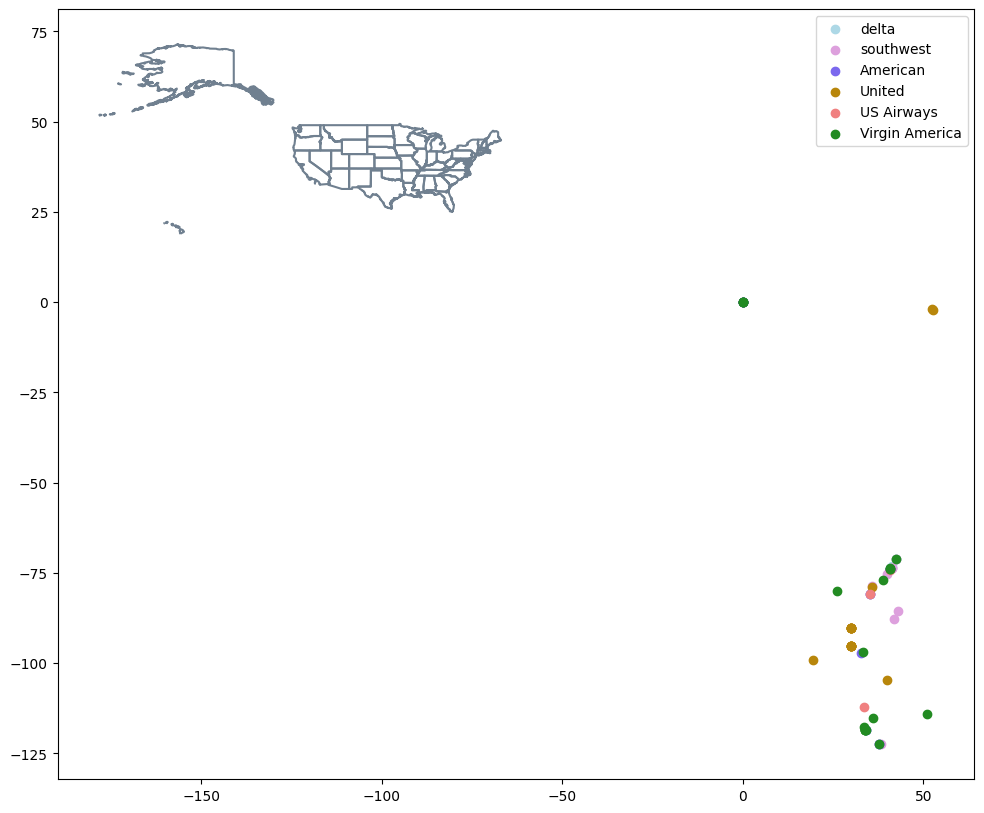

In [10]:
fig,ax=plt.subplots(figsize=(15,10))

US.boundary.plot(ax=ax,color='slategrey')

g.plot(ax=ax,color='lightblue',label='delta')
g1.plot(ax=ax,color='plum',label='southwest')
g2.plot(ax=ax,color='mediumslateblue',label='American')
g3.plot(ax=ax,color='darkgoldenrod',label='United')
g4.plot(ax=ax,color='lightcoral',label='US Airways')
g5.plot(ax=ax,color='forestgreen',label='Virgin America')

plt.legend()